In [281]:
import pandas as pd
weather = pd.read_csv("weather_data.csv", index_col=0, parse_dates=True)

weather_fields = weather[['temp','dew_point','feels_like','temp_min', 'temp_min','temp_max','pressure','humidity','wind_speed','wind_deg','wind_gust','rain_1h','rain_3h','clouds_all','weather_main','weather_description']]
weather_fields.index = pd.to_datetime(weather_fields.index, unit='s')

def choose_year(df, year):
    mask = (
        (df.index > pd.to_datetime(f'{year}-01-01', format='%Y-%m-%d')) & 
        (df.index <= pd.to_datetime(f'{year}-12-31', format='%Y-%m-%d'))
    )
    return df.loc[mask]

In [282]:
# axs = weather_fields.plot.line(figsize=(18, 54), subplots=True)
# choose_year(weather_fields, '2020')['temp'].describe()

<AxesSubplot:xlabel='dt'>

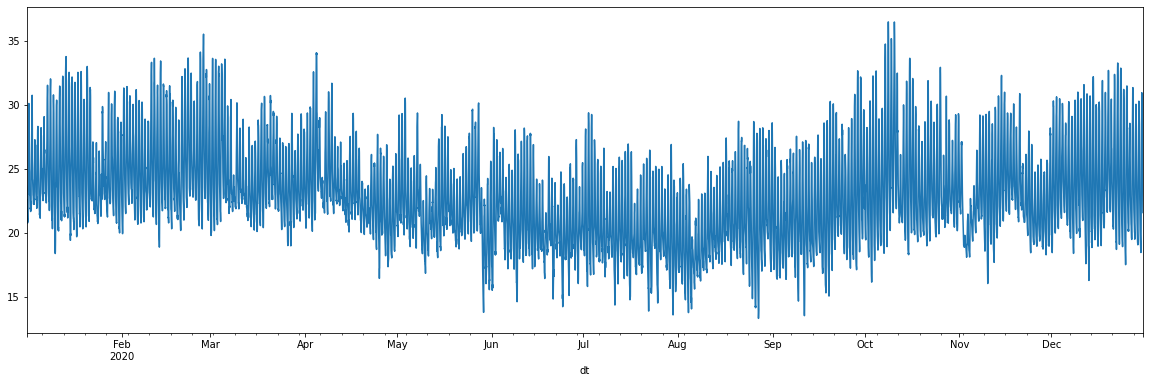

In [145]:
choose_year(weather_fields, '2020')['temp'].plot(figsize=(20, 6))


<AxesSubplot:xlabel='dt'>

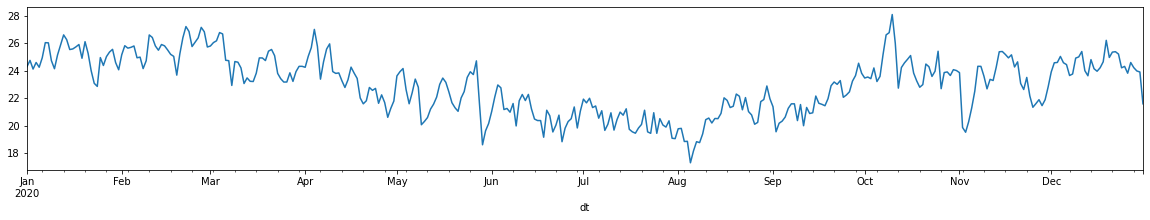

In [212]:
choose_year(weather_fields, '2020')['temp'].groupby(pd.Grouper(freq="D")).mean().plot(figsize=(20, 3))

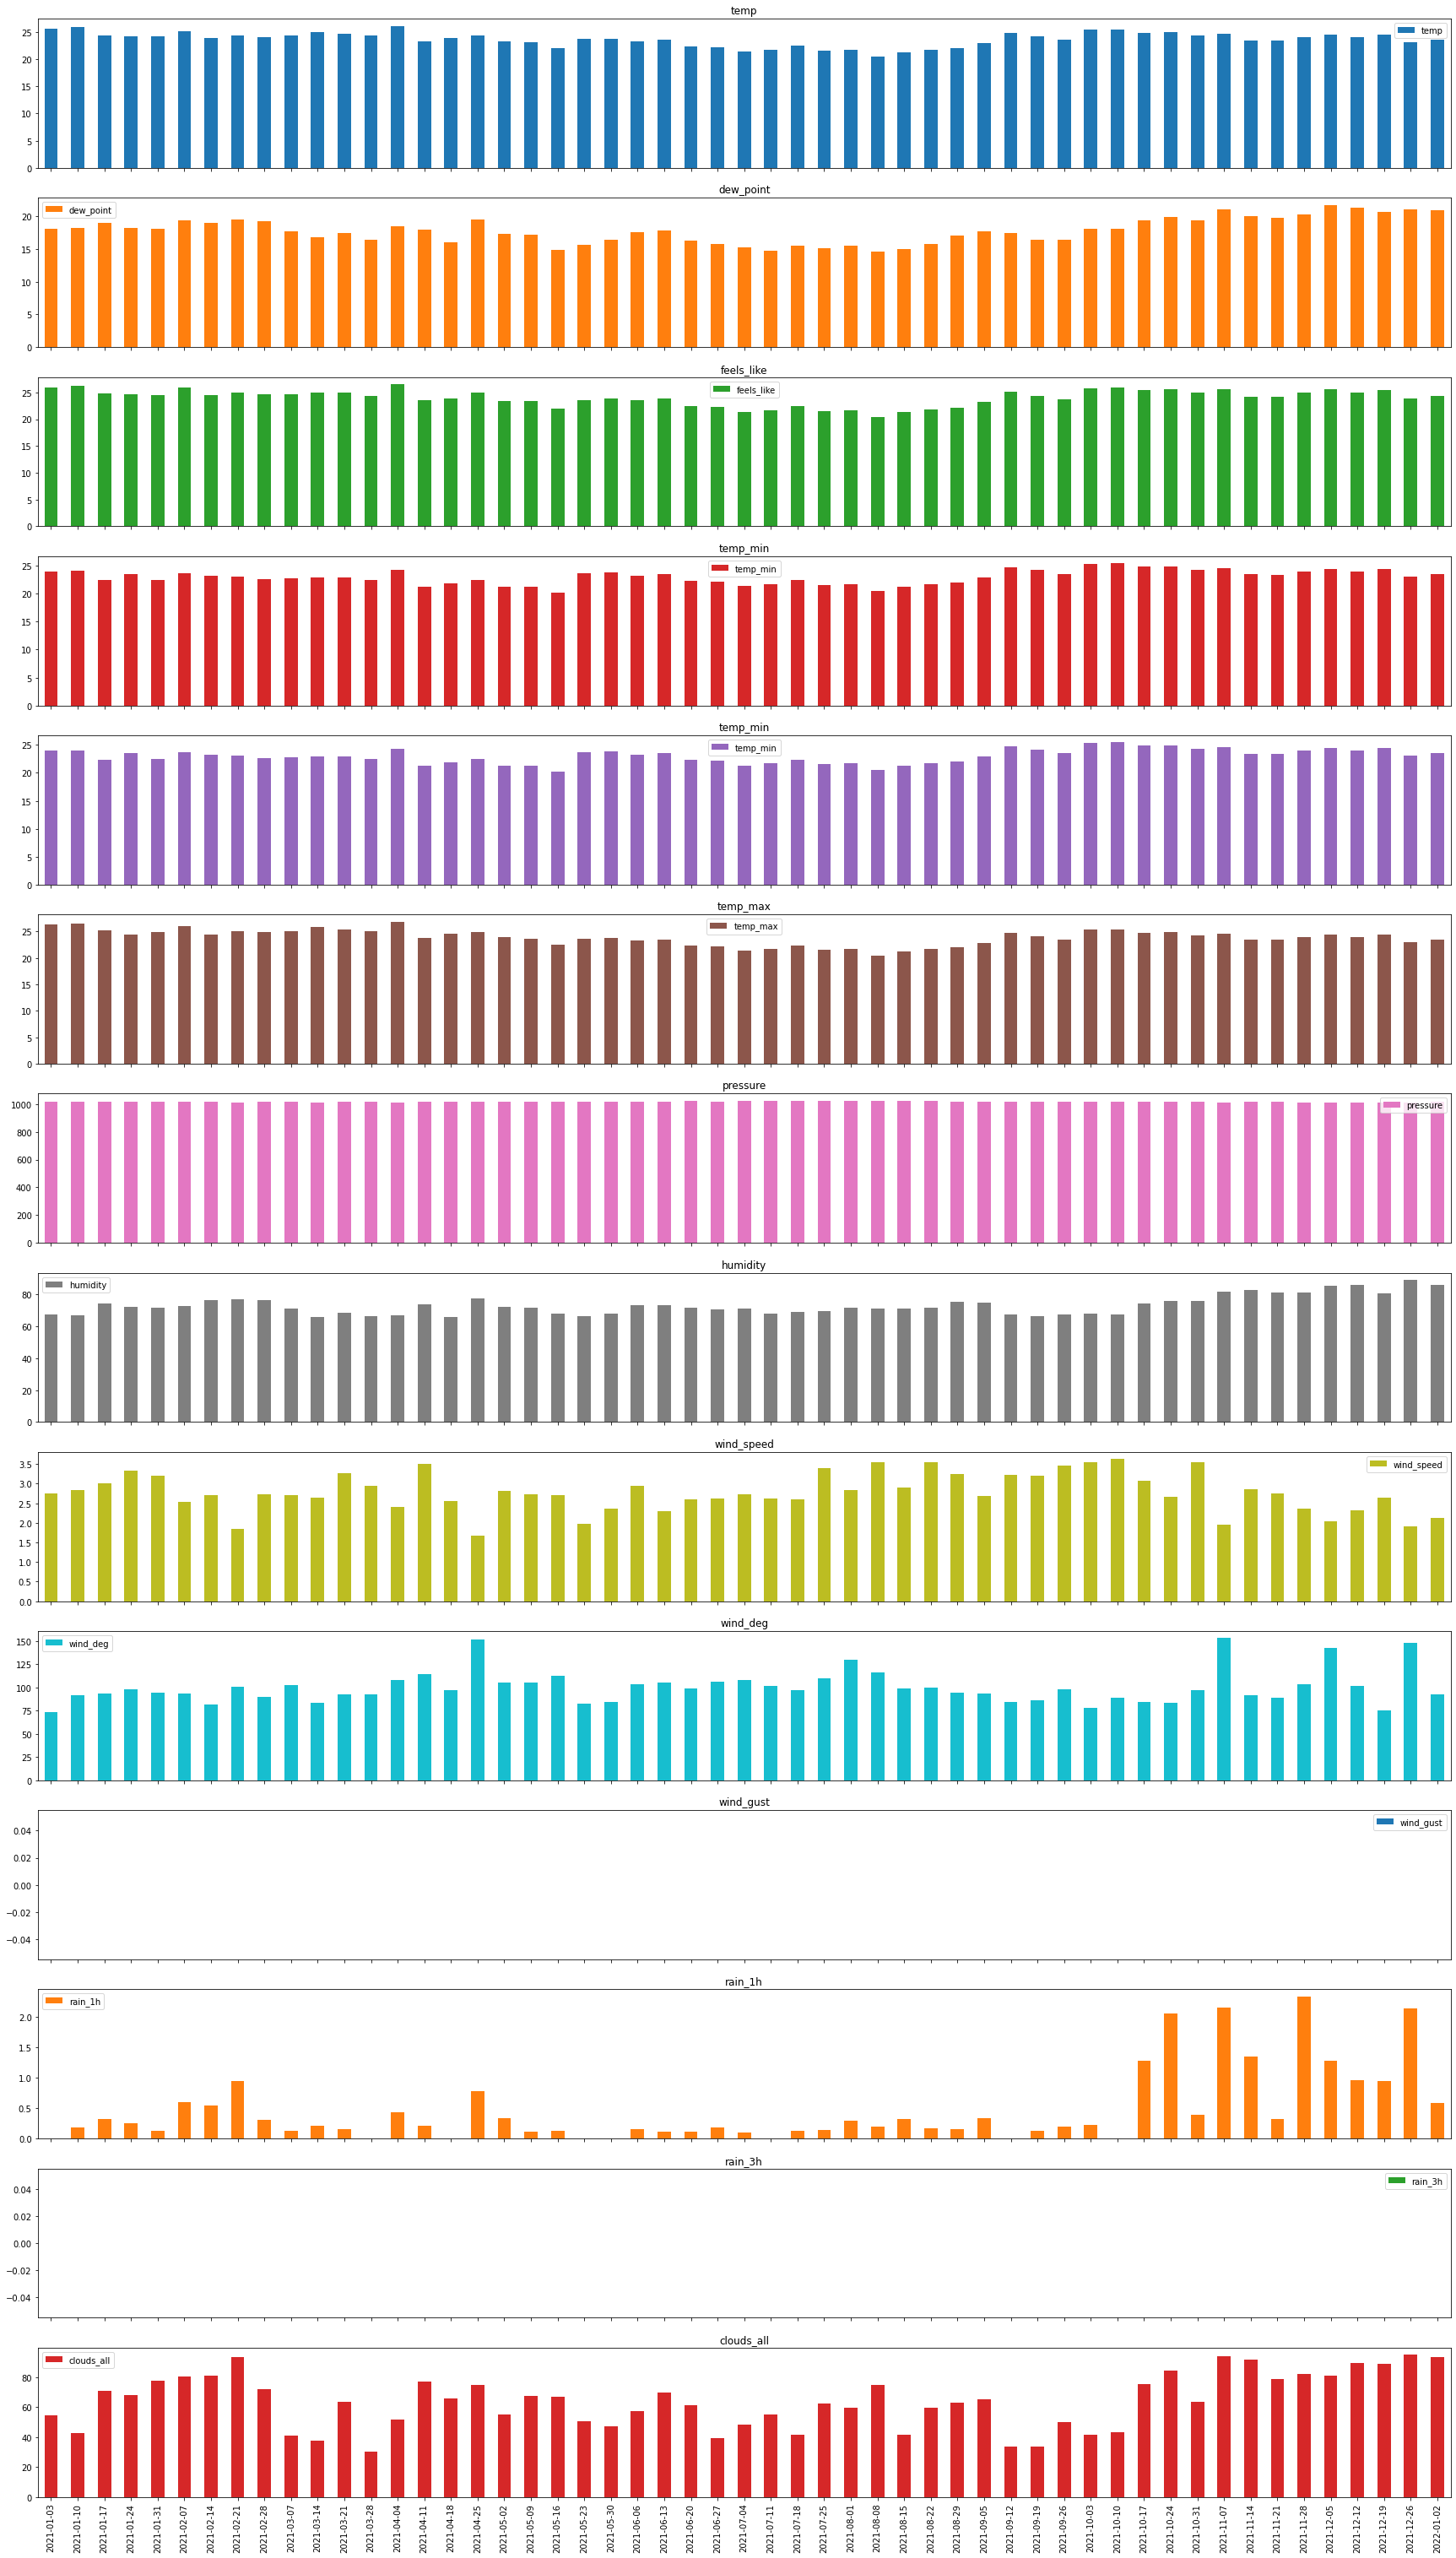

In [285]:
data = choose_year(weather_fields, '2021').groupby(pd.Grouper(freq="W")).mean()
data.index = data.index.date
result = data.plot.bar(figsize=(30, 54), subplots=True)


<AxesSubplot:>

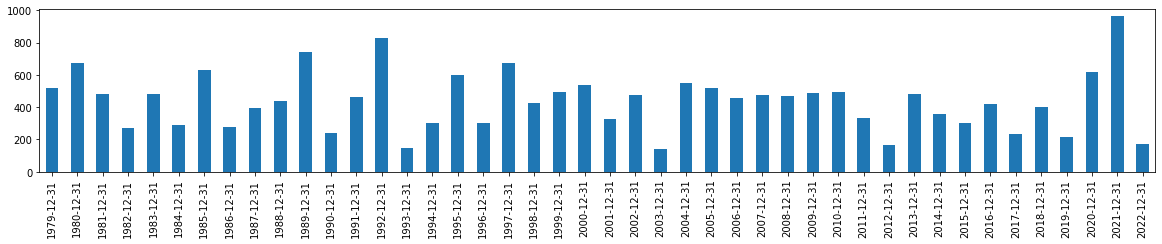

In [215]:
# Chuva Anual
data = weather_fields['rain_1h'].groupby(pd.Grouper(freq="Y")).sum()
data.index = data.index.date    # exclude hh:mm:ss from the index and consequently from x axis labels
data.plot.bar(figsize=(20, 3))  # DataFrameGroupBy (grouped by Month)

<AxesSubplot:xlabel='dt'>

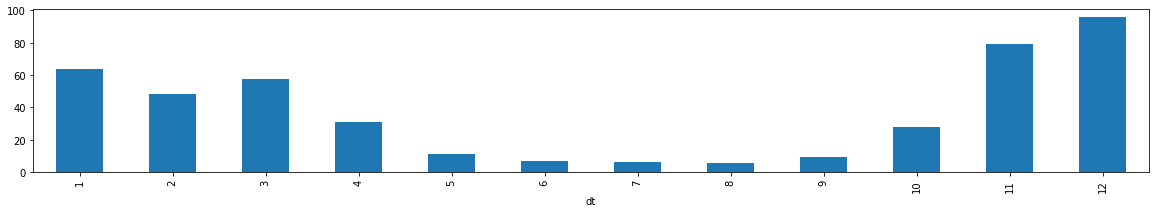

In [280]:
# Media mensal de chuva desde 1979 --> chuva esperada a cada mes
monthly_rain = weather_fields['rain_1h'].groupby(pd.Grouper(freq="M")).sum()
monthly_rain_over_years = monthly_rain.groupby(monthly_rain.index.month).mean()

monthly_rain_over_years.plot.bar(figsize=(20, 3))

<AxesSubplot:xlabel='dt'>

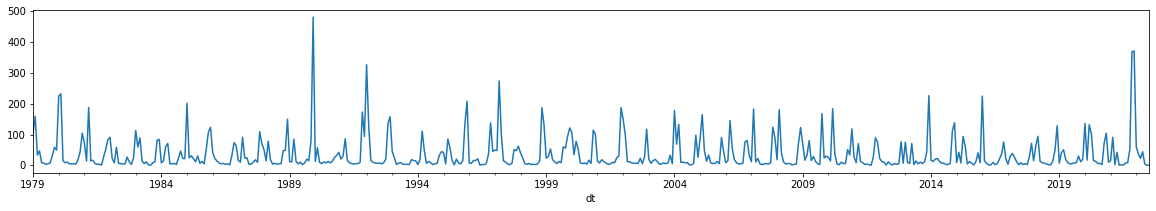

In [163]:
# Chuva mensal
weather_fields['rain_1h'].groupby(pd.Grouper(freq="M")).sum().plot(figsize=(20, 3))  # DataFrameGroupBy (grouped by Month)

<AxesSubplot:>

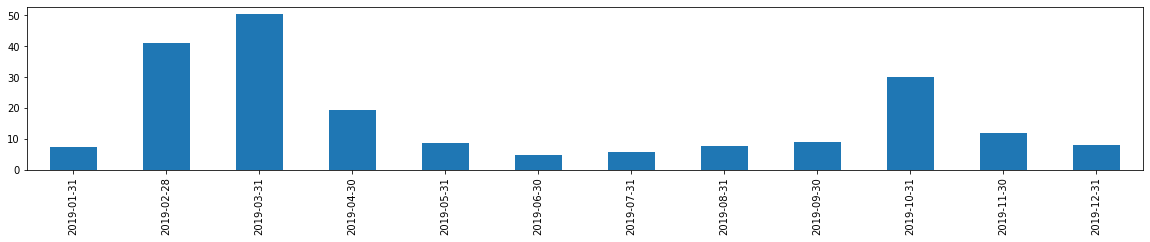

In [243]:
# Chuva em 2019
data = choose_year(weather_fields, '2019')['rain_1h'].groupby(pd.Grouper(freq="M")).sum()
data.index = data.index.date
data.plot.bar(figsize=(20, 3))  # DataFrameGroupBy (grouped by Month)

<AxesSubplot:>

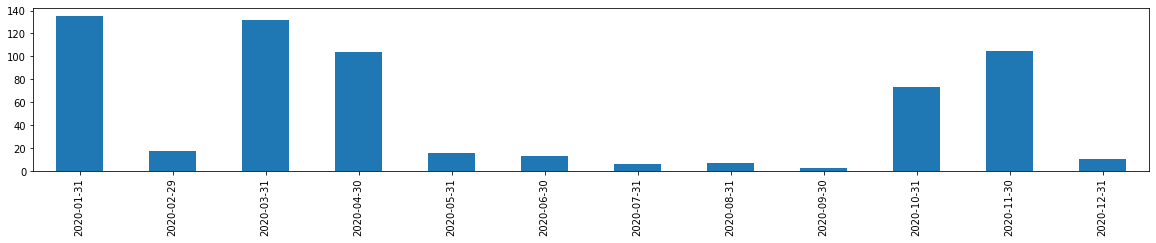

In [245]:
# Chuvas 2020
data = choose_year(weather_fields, '2020')['rain_1h'].groupby(pd.Grouper(freq="M")).sum()
data.index = data.index.date
data.plot.bar(figsize=(20, 3)) 

<AxesSubplot:>

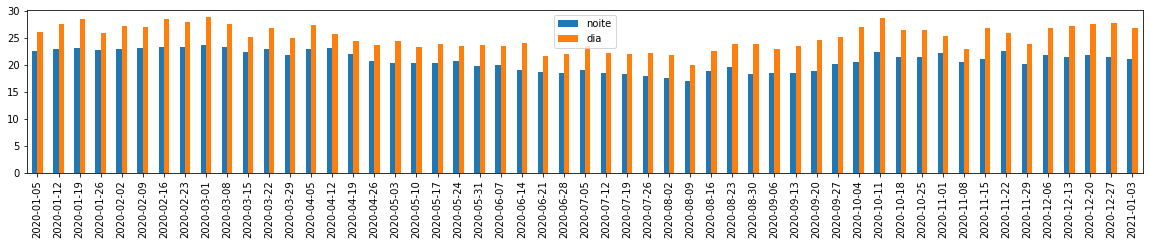

In [278]:
# Diferenca temperatura dia e noite em 2020
ano2020=choose_year(weather_fields, '2020')['temp']
temp_noite=ano2020.between_time('21:00','09:00').groupby(pd.Grouper(freq="W")).mean()
temp_dia=ano2020.between_time('09:00','21:00').groupby(pd.Grouper(freq="W")).mean()

dia_noite = pd.concat({
    'noite': temp_noite, 'dia': temp_dia
}, axis=1)

dia_noite.index = dia_noite.index.date # eliminate hour

dia_noite.plot.bar(figsize=(20, 3))